In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df=pd.read_csv('./DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

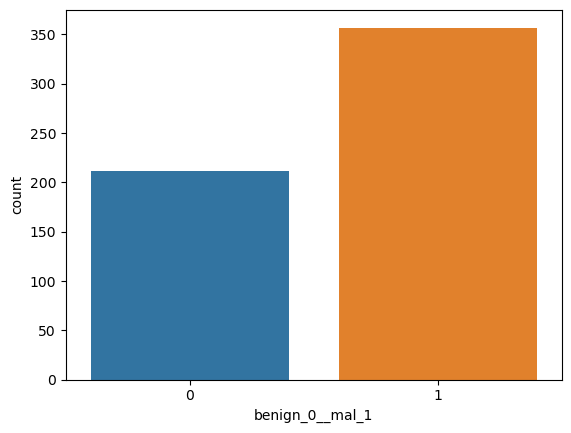

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

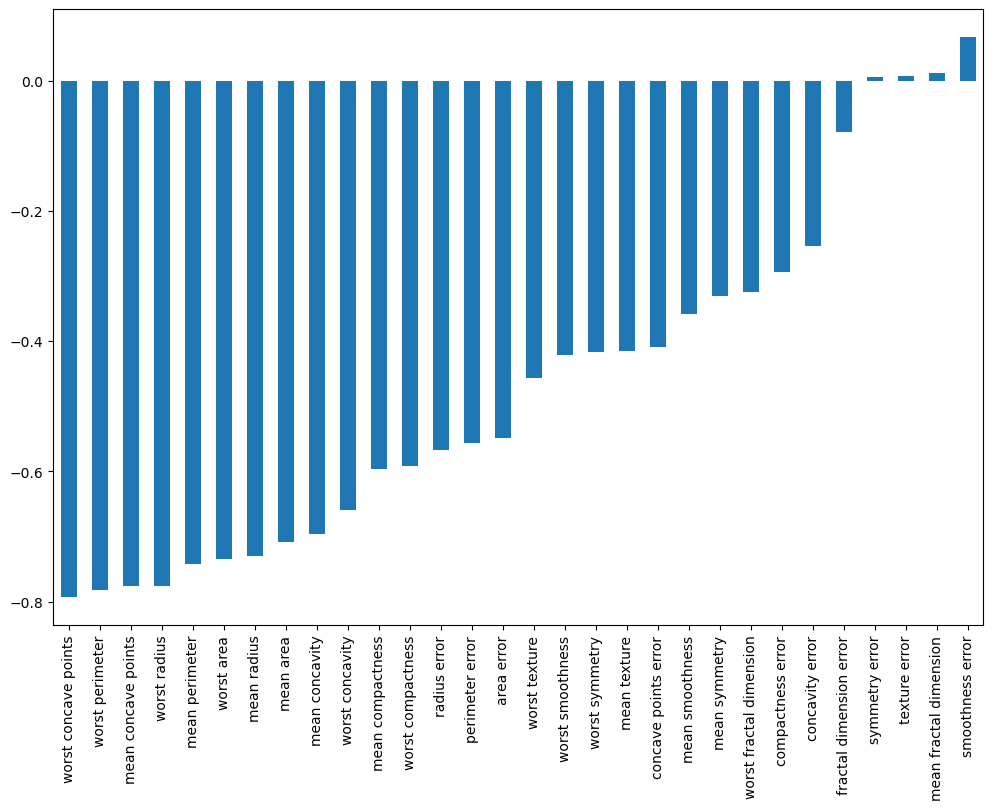

In [7]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

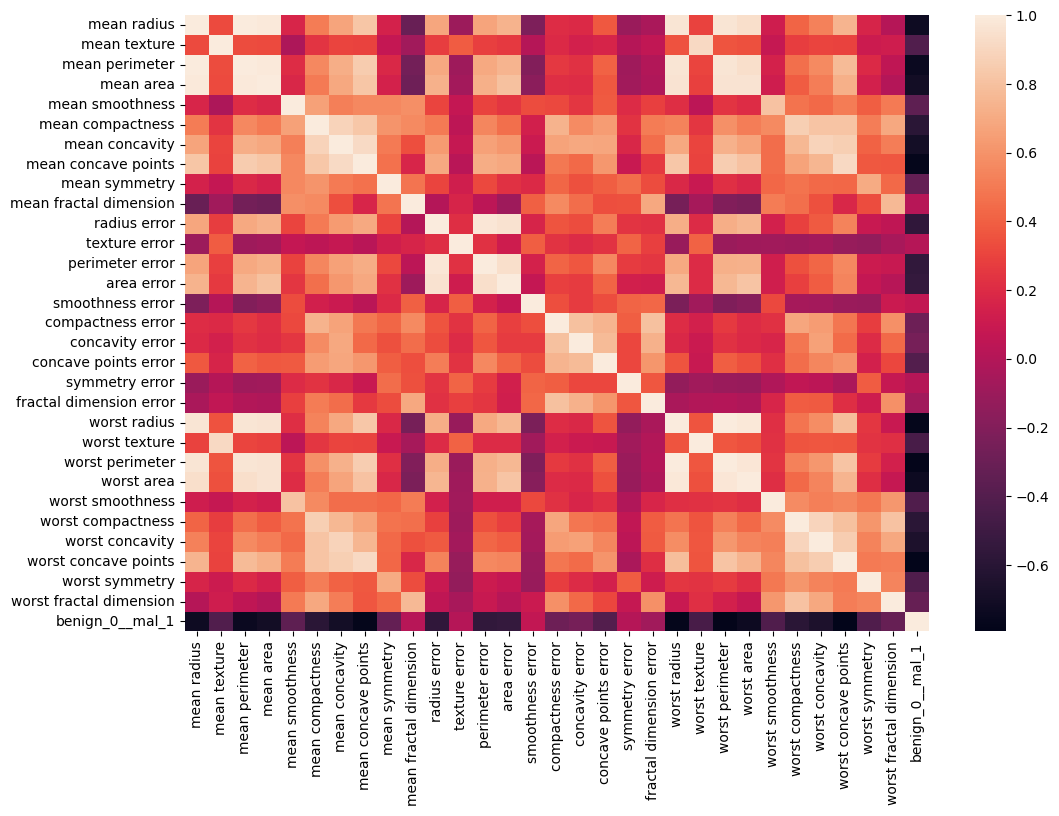

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [9]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values



In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [16]:
X_train.shape

(426, 30)

In [17]:

model=Sequential()
model.add(Dense(30,activation='relu'))
model.add( Dense(15,activation='relu'))

# Binary Activation
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6582 - val_loss: 0.6334
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6134 - val_loss: 0.5935
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5753 - val_loss: 0.5536
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5358 - val_loss: 0.5093
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4909 - val_loss: 0.4612
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4445 - val_loss: 0.4122
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3994 - val_loss: 0.3674
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3574 - val_loss: 0.3276
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3230 - val_loss: 0.2927
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2926 - val_loss: 0.2625
Epoch 11/

In [19]:
losses=pd.DataFrame(model.history.history)

<Axes: >

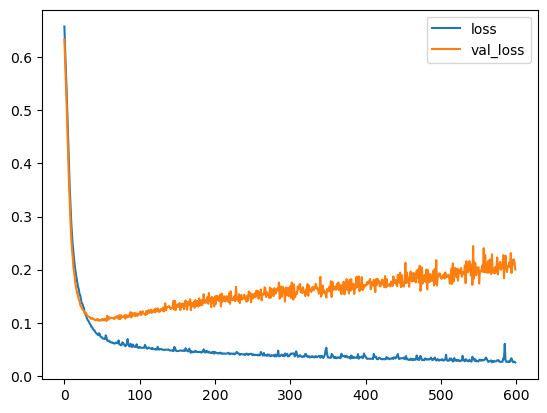

In [20]:
losses.plot()
# Overfitted model

In [21]:

model=Sequential()
model.add(Dense(30,activation='relu'))
model.add( Dense(15,activation='relu'))

# Binary Activation
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_dtop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [24]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_dtop])

Epoch 1/600


14/14 [==============================] - 0s 5ms/step - loss: 0.6850 - val_loss: 0.6677
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6598 - val_loss: 0.6403
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6269 - val_loss: 0.6023
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5929 - val_loss: 0.5666
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5546 - val_loss: 0.5279
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5153 - val_loss: 0.4869
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4731 - val_loss: 0.4419
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4278 - val_loss: 0.3961
Epoch 9/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3829 - val_loss: 0.3508
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3415 - val_loss: 0.3106
Epoch 11/600
14/14 [=

In [25]:
mloss=pd.DataFrame(model.history.history)

<Axes: >

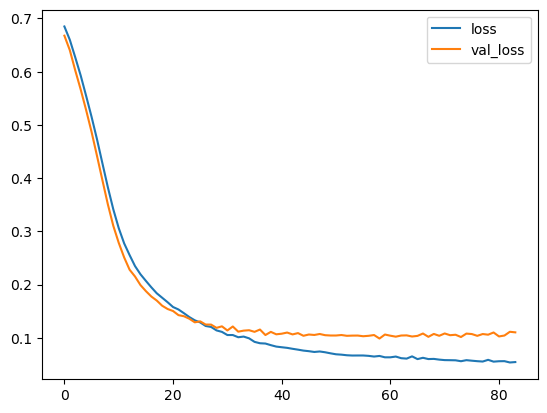

In [26]:
mloss.plot()

In [27]:

model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add( Dense(15,activation='relu'))
model.add(Dropout(0.5))
# Binary Activation
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [28]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_dtop])

Epoch 1/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6878 - val_loss: 0.6774
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6810 - val_loss: 0.6551
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6519 - val_loss: 0.6317
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6250 - val_loss: 0.5979
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5998 - val_loss: 0.5675
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5917 - val_loss: 0.5352
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5539 - val_loss: 0.5011
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5268 - val_loss: 0.4673
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5157 - val_loss: 0.4339
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4660 - val_loss: 0.4011
Epoch 11/

In [29]:
lls=pd.DataFrame(model.history.history)

<Axes: >

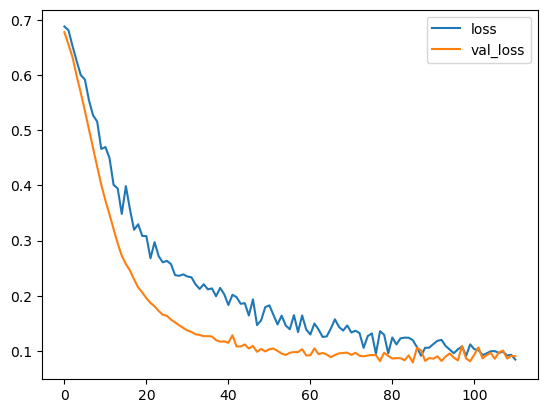

In [30]:
lls.plot()

In [31]:
# for classification
y_predict = np.argmax(model.predict(X_test), axis=-1)


5/5 [==============================] - 0s 702us/step


In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.38      1.00      0.56        55
           1       0.00      0.00      0.00        88

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.28       143
weighted avg       0.15      0.38      0.21       143



/Users/kadima/anaconda3/envs/hls/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kadima/anaconda3/envs/hls/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kadima/anaconda3/envs/hls/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print(confusion_matrix(y_test,y_predict))

[[55  0]
 [88  0]]
